**Srijit Saha (MDS202150)**


**Ved Prakash (MDS202153)**

**Dona Ghosh (MDS202116)**



# ADVANCED MACHINE LEARNING ASSIGNMENT - 3
BALANCING CARTPOLE USING OPEN-AI GYM

**Q learning is a model-free reinforcement learning algorithm. It will learn a policy which will tell it what to do given a certain situation. Over the course of training, the Q learning will update its policy to find the optimal (or the closest it can get) action given a state.**

**On every run the Q table is updated with a new Q value. This is defined in the above equation. This takes the existing value and multiplies it by the learned value. The learned value is a compilation of the reward from the latest move and the maximum Q value from the new state.**

**Problem 1: With default reward scheme of +1 for every step taken, including the termination step**


Run: 0 Average: 15.0 Min: 15 Max: 15
Run: 100 Average: 23.76 Min: 9 Max: 73
Run: 200 Average: 23.52 Min: 9 Max: 75
Run: 300 Average: 23.29 Min: 9 Max: 67
Run: 400 Average: 23.77 Min: 10 Max: 79
Run: 500 Average: 26.61 Min: 10 Max: 97
Run: 600 Average: 24.02 Min: 9 Max: 75
Run: 700 Average: 23.84 Min: 9 Max: 57
Run: 800 Average: 27.33 Min: 9 Max: 70
Run: 900 Average: 25.61 Min: 9 Max: 84
Run: 1000 Average: 28.43 Min: 11 Max: 76
Run: 1100 Average: 31.15 Min: 9 Max: 80
Run: 1200 Average: 30.24 Min: 9 Max: 84
Run: 1300 Average: 29.87 Min: 9 Max: 109
Run: 1400 Average: 33.0 Min: 9 Max: 110
Run: 1500 Average: 28.96 Min: 9 Max: 87
Run: 1600 Average: 32.99 Min: 10 Max: 103
Run: 1700 Average: 35.75 Min: 12 Max: 146
Run: 1800 Average: 34.23 Min: 10 Max: 112
Run: 1900 Average: 39.4 Min: 9 Max: 103
Run: 2000 Average: 40.73 Min: 10 Max: 139
Run: 2100 Average: 42.75 Min: 9 Max: 143
Run: 2200 Average: 43.16 Min: 10 Max: 124
Run: 2300 Average: 44.54 Min: 10 Max: 151
Run: 2400 Average: 48.89 Min: 11 Ma

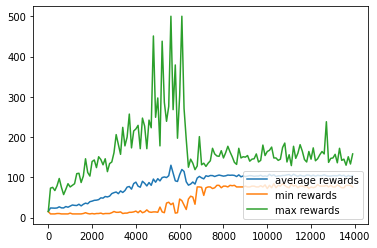

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
env = gym.make('CartPole-v1')

# How much new info will override old info. 0 means nothing is learned, 1 means only most recent is considered, old knowledge is discarded
LEARNING_RATE = 0.1
# Between 0 and 1, mesue of how much we carre about future reward over immedate reward
DISCOUNT = 0.9
RUNS = 14000  # Number of iterations run
SHOW_EVERY = 2000  # How oftern the current solution is rendered
UPDATE_EVERY = 100  # How oftern the current progress is recorded

# Exploration settings
epsilon = 1  # not a constant, going to be decayed
START_EPSILON_DECAYING = 1
END_EPSILON_DECAYING = RUNS // 2
epsilon_decay_value = epsilon / (END_EPSILON_DECAYING - START_EPSILON_DECAYING)
# epsilon decay as a function of episodes completed

# Create bins and Q table
def create_bins_and_q_table():
	# env.observation_space.high
	# [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
	# env.observation_space.low
	# [-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]

	# remove hard coded Values when I know how to

	numBins = 20
	obsSpaceSize = len(env.observation_space.high)

	# Get the size of each bucket
	bins = [
		np.linspace(-4.8, 4.8, numBins),
		np.linspace(-4, 4, numBins),
		np.linspace(-.418, .418, numBins),
		np.linspace(-4, 4, numBins)
	]

	qTable = np.random.uniform(low=-2, high=0, size=([numBins] * obsSpaceSize + [env.action_space.n]))

	return bins, obsSpaceSize, qTable

# Given a state of the enviroment, return its descreteState index in qTable
def get_discrete_state(state, bins, obsSpaceSize):
	stateIndex = []
	for i in range(obsSpaceSize):
		stateIndex.append(np.digitize(state[i], bins[i]) - 1) # -1 will turn bin into index
	return tuple(stateIndex)


bins, obsSpaceSize, qTable = create_bins_and_q_table()

previousCnt = []  # array of all scores over runs
metrics = {'ep': [], 'avg': [], 'min': [], 'max': []}  # metrics recorded for graph

for run in range(RUNS+ 1):
	discreteState = get_discrete_state(env.reset(), bins, obsSpaceSize)
	done = False  # has the enviroment finished?
	cnt = 0  # how may movements cart has made

	while not done:


		cnt += 1
		# Get action from Q table
		if np.random.random() > epsilon:
			action = np.argmax(qTable[discreteState])
		# Get random action
		else:
			action = np.random.randint(0, env.action_space.n)
		newState, reward, done, _ = env.step(action)  # perform action on enviroment

		newDiscreteState = get_discrete_state(newState, bins, obsSpaceSize)

		maxFutureQ = np.max(qTable[newDiscreteState])  # estimate of optional future value
		currentQ = qTable[discreteState + (action, )]  # old value
		# if (abs(newState[2]) > 0.20944 or abs(newState[0]) > 2.4) or cnt >= 500:
		# 	break
		# default termination conditions

		# formula to caculate all Q values
		newQ = (1 - LEARNING_RATE) * currentQ + LEARNING_RATE * (reward + DISCOUNT * maxFutureQ)
		qTable[discreteState + (action, )] = newQ  # Update qTable with new Q value

		discreteState = newDiscreteState

	previousCnt.append(cnt)

	# Decaying is being done every run if run number is within decaying range
	if END_EPSILON_DECAYING >= run >= START_EPSILON_DECAYING:
		epsilon -= epsilon_decay_value

	# Add new metrics for graph
	if run % UPDATE_EVERY == 0:
		latestRuns = previousCnt[-UPDATE_EVERY:]
		averageCnt = sum(latestRuns) / len(latestRuns)
		metrics['ep'].append(run)
		metrics['avg'].append(averageCnt)
		metrics['min'].append(min(latestRuns))
		metrics['max'].append(max(latestRuns))
		print("Run:", run, "Average:", averageCnt, "Min:", min(latestRuns), "Max:", max(latestRuns))


env.close()

# Plot graph
plt.plot(metrics['ep'], metrics['avg'], label="average rewards")
plt.plot(metrics['ep'], metrics['min'], label="min rewards")
plt.plot(metrics['ep'], metrics['max'], label="max rewards")
plt.legend(loc=4)
plt.show()

*The Updated Q-Table shows the optimal q values after running:*


In [ ]:
qTable

array([[[[[-7.67963692e-01, -1.42676481e+00],
          [-3.93217542e-01, -7.95912443e-02],
          [-5.69478503e-01, -1.65734126e-03],
          ...,
          [-6.72835199e-01, -5.92728737e-01],
          [-1.20504787e+00, -9.14469384e-01],
          [-1.62573615e+00, -1.79153092e+00]],

         [[-8.60719864e-01, -7.04976166e-02],
          [-4.78117407e-01, -1.24214051e+00],
          [-1.22464954e+00, -1.12430379e+00],
          ...,
          [-1.59860069e+00, -1.58497713e+00],
          [-2.27601303e-01, -8.48974855e-02],
          [-1.17970065e+00, -7.08251583e-01]],

         [[-1.93189332e+00, -1.04374756e+00],
          [-7.06734107e-01, -1.89493559e+00],
          [-1.65910886e+00, -1.92916288e+00],
          ...,
          [-4.47430819e-01, -1.67508651e+00],
          [-1.14429523e+00, -4.14598661e-02],
          [-1.20970787e+00, -1.84683649e+00]],

         ...,

         [[-1.79695637e-01, -6.29190153e-01],
          [-7.99563559e-01, -9.21408770e-01],
          [-8.

**Problem 2: a new version of the game, where the reward is 0 for every time step. But, if the pole angle degree is in the range (-12, -6) or (6, 12), then there is a reward of +2.**

**Convert degrees to radians as gym takes radian values for computation.**

**12 degrees = .209 radians**

**6 degrees = .104 radians**

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
env = gym.make('CartPole-v1')

# How much new info will override old info. 0 means nothing is learned, 1 means only most recent is considered, old knowledge is discarded
LEARNING_RATE = 0.1
# Between 0 and 1, mesue of how much we carre about future reward over immedate reward
DISCOUNT = 0.9
RUNS = 14000  # Number of iterations run
SHOW_EVERY = 2000  # How often the current solution is rendered
UPDATE_EVERY = 100  # How often the current progress is recorded

# Exploration settings
epsilon = 1  # not a constant, going to be decayed
START_EPSILON_DECAYING = 1
END_EPSILON_DECAYING = RUNS // 2
epsilon_decay_value = epsilon / (END_EPSILON_DECAYING - START_EPSILON_DECAYING)

# def reward_mod(newState):
#   if (newState[2] > 0.104 and newState[2] < .209) or (newState[2] < -0.104 and newState[2] > -.209):
#     reward = 2
#   else:
#     reward = 0
#   return reward

# Create bins and Q table
def create_bins_and_q_table():
	# env.observation_space.high
	# [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
	# env.observation_space.low
	# [-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]


    numBins = 20
    obsSpaceSize = len(env.observation_space.high)

	# Get the size of each bucket
    bins = [
        np.linspace(-4.8, 4.8, numBins),
        np.linspace(-4, 4, numBins),
        np.linspace(-.418, .418, numBins),
        np.linspace(-4, 4, numBins)]


    qTable = np.random.uniform(low=-2, high=0, size=([numBins] * obsSpaceSize + [env.action_space.n]))

    return bins, obsSpaceSize, qTable


# Given a state of the enviroment, return its descreteState index in qTable
def get_discrete_state(state, bins, obsSpaceSize):
    stateIndex = []
    for i in range(obsSpaceSize):
        stateIndex.append(np.digitize(state[i], bins[i]) - 1) # -1 will turn bin into index
    return tuple(stateIndex)


bins, obsSpaceSize, qTable = create_bins_and_q_table()

previousCnt = []  # array of all scores over runs
metrics = {'ep': [], 'avg': [], 'min': [], 'max': []}  # metrics recorded for graph

for run in range(RUNS+1):
    discreteState = get_discrete_state(env.reset(), bins, obsSpaceSize)
    done = False  # has the enviroment finished?
    cnt = 0  # how may movements cart has made

    while not done:

            # if run % SHOW_EVERY == 0:
		# 	env.render()  # if running RL comment this out


        cnt += 1
		# Get action from Q table
        if np.random.random() > epsilon:
            action = np.argmax(qTable[discreteState])
		# Get random action
        else:
            action = np.random.randint(0, env.action_space.n)
        newState, reward, done, _ = (env.step(action)) # perform action on enviroment

        if (newState[2] > 0.104 and newState[2] < .209) or (newState[2] < -0.104 and newState[2] > -.209):
            reward = 2
        else:
            reward = 0
        # pole falls over if pole velocity or angle exceeds given threshold
        # if (abs(newState[2]) > 0.20944 or abs(newState[0]) > 2.4) or cnt >= 500:
        #   break
        # episode termination occurs when over 500 steps have been exceeded





        newDiscreteState = get_discrete_state(newState, bins, obsSpaceSize)

        maxFutureQ = np.max(qTable[newDiscreteState])  # estimate of optiomal future value
        currentQ = qTable[discreteState + (action, )]  # old value


		# pole fell over / went out of bounds, negative reward


		# formula to calculate all Q values
        newQ = (1 - LEARNING_RATE) * currentQ + LEARNING_RATE * (reward + DISCOUNT * maxFutureQ)
        qTable[discreteState + (action, )] = newQ  # Update qTable with new Q value

        discreteState = newDiscreteState

    previousCnt.append(cnt)


	# Decaying is being done every run if run number is within decaying range
    if END_EPSILON_DECAYING >= run >= START_EPSILON_DECAYING:
        epsilon -= epsilon_decay_value

	# Add new metrics for graph
    if run % UPDATE_EVERY == 0:
        latestRuns = previousCnt[-UPDATE_EVERY:]
        averageCnt = sum(latestRuns) / len(latestRuns)
        metrics['ep'].append(run)
        metrics['avg'].append(averageCnt)
        metrics['min'].append(min(latestRuns))
        metrics['max'].append(max(latestRuns))
        print("Run:", run, "Average:", averageCnt, "Min:", min(latestRuns), "Max:", max(latestRuns))

env.close()



Run: 0 Average: 10.0 Min: 10 Max: 10
Run: 100 Average: 24.41 Min: 8 Max: 87
Run: 200 Average: 22.39 Min: 9 Max: 65
Run: 300 Average: 22.93 Min: 9 Max: 64
Run: 400 Average: 22.97 Min: 10 Max: 73
Run: 500 Average: 19.72 Min: 10 Max: 48
Run: 600 Average: 20.69 Min: 9 Max: 84
Run: 700 Average: 20.62 Min: 9 Max: 77
Run: 800 Average: 21.2 Min: 9 Max: 66
Run: 900 Average: 20.3 Min: 8 Max: 56
Run: 1000 Average: 19.93 Min: 10 Max: 51
Run: 1100 Average: 18.81 Min: 9 Max: 57
Run: 1200 Average: 19.16 Min: 8 Max: 53
Run: 1300 Average: 19.86 Min: 9 Max: 56
Run: 1400 Average: 21.04 Min: 9 Max: 75
Run: 1500 Average: 19.14 Min: 9 Max: 60
Run: 1600 Average: 20.82 Min: 9 Max: 58
Run: 1700 Average: 22.83 Min: 8 Max: 83
Run: 1800 Average: 19.48 Min: 9 Max: 64
Run: 1900 Average: 20.84 Min: 8 Max: 70
Run: 2000 Average: 19.69 Min: 9 Max: 58
Run: 2100 Average: 21.9 Min: 9 Max: 70
Run: 2200 Average: 19.91 Min: 9 Max: 92
Run: 2300 Average: 21.44 Min: 9 Max: 56
Run: 2400 Average: 19.69 Min: 9 Max: 76
Run: 2500 Av

*The Updated Q-Table shows the optimal q values after running*


In [ ]:
qTable

array([[[[[-6.21696981e-01, -1.43191526e+00],
          [-1.08119304e+00, -1.95760462e+00],
          [-4.18992835e-01, -6.00833293e-01],
          ...,
          [-1.12415133e+00, -1.82925697e+00],
          [-7.87840736e-02, -2.00769151e-01],
          [-9.80306204e-01, -1.28429978e+00]],

         [[-1.22465180e+00, -5.14689031e-01],
          [-9.33487990e-01, -1.34067700e+00],
          [-1.16415458e+00, -1.14986587e+00],
          ...,
          [-5.57341934e-02, -1.22890003e+00],
          [-7.37891331e-01, -5.82264025e-01],
          [-1.25878047e+00, -1.19470714e+00]],

         [[-1.50371366e+00, -3.36665220e-01],
          [-1.02530712e+00, -7.78585217e-01],
          [-5.03163023e-02, -1.02866669e+00],
          ...,
          [-4.31162346e-01, -3.12458827e-01],
          [-1.45259352e+00, -8.49942648e-01],
          [-1.71298389e+00, -1.07099045e+00]],

         ...,

         [[-3.57886747e-01, -5.29669724e-01],
          [-1.76212734e+00, -4.59239168e-01],
          [-2.

**The episodic reward metrics are given below for the 2nd problem**

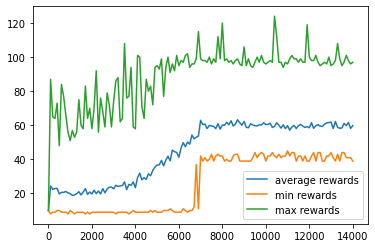

In [ ]:
plt.plot(metrics['ep'], metrics['avg'], label="average rewards")
plt.plot(metrics['ep'], metrics['min'], label="min rewards")
plt.plot(metrics['ep'], metrics['max'], label="max rewards")
plt.legend(loc=4)

**In the second problem, owing to the different pattern of rewards, it can be seen that, the agent gets proper rewards only after experimenting with pole angle and pole velocity, due to which the rewards keep on increasing throughout the run of all the episodes, while in the 1st case, the reward values fluctuate.**
